# AMEX: 

_Gaurav Mehan_ 

## Predicting credit card application acceptance



In [1]:
#data analysis and visualisation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random

from typing import TypeVar, List, Tuple
X = TypeVar('X')    #generic type to represent a data point
Y = TypeVar('Y')    #generic type to represent ouput variables

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


### Part I: Data analysis and cleaning 

In [2]:
data = pd.read_csv('Dataset 3.csv') 
data_clean = data.loc[data['age'] > 18] #legal age to obtain credit card
print('The number of new data records is:', len(data_clean))


The number of new data records is: 1312


NB: we've had to remove all records for which the 'age' has not been properly taken, i.e. uncredible ages. All records for which the age is above 18 has been defined as credible, as this is the minimum age that one can legally apply for a credit card in the UK

In [3]:
data_clean.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


A general overview of the first five records can be found above. 
<br>
<br>
It would be ideal, and would save us a lot of hassle later, if we could convert 'yes/no' data into '1/0' to 
allow for numerical analysis and calculation of mean, mode etc.

In [4]:
#replace 'yes/no' with binary
data_clean.card.replace(('yes', 'no'), (1, 0), inplace=True)
data_clean.owner.replace(('yes', 'no'), (1, 0), inplace=True)
data_clean.selfemp.replace(('yes', 'no'), (1, 0), inplace=True)


In [5]:
data_clean.describe()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.775152,0.458079,33.387386,3.367257,0.068636,184.970390,0.441311,0.069360,0.993902,55.182927,0.817835,6.999238
std,0.417641,1.348416,9.884200,1.697377,0.094787,272.714742,0.496733,0.254162,1.247408,66.254140,0.386127,6.314718
min,0.000000,0.000000,18.166670,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.237125,0.002208,4.583333,0.000000,0.000000,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.291665,2.900000,0.038775,101.231650,0.000000,0.000000,1.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093516,248.970800,1.000000,0.000000,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,1.000000,1.000000,6.000000,540.000000,1.000000,46.000000


We can quickly analyse the data we have having the mean, standard deviation, and other statistical features of the dataset analysed:
- on average, 77% of applications are accepted
- the average age for applying is: 33
- the average income is: £33,672
- the majority of applicants have at least one dependent, i.e. child or partner
- ...


### Part II: Visualisation and Correlation of data

Having loaded the data, and made some basic statements, we can fully explore correlations between factors that would
influence the outcome of one's credit card application.

In [6]:
#corelating 'owner' and 'card'
data_clean[["owner", "card"]].groupby(['owner'], as_index=False).mean().sort_values(by='card', ascending=False)

,owner,card
1,1,0.844560
0,0,0.720327


It seems as being an owner of a house increases your chances of acceptance. This seems logical as assets provide 
a security net when payments are defaulted, for example.

In [7]:
#correlating 'selfemp' and 'card
data_clean[["selfemp", "card"]].groupby(['selfemp'], as_index=False).mean().sort_values(by='card', ascending=False)

,selfemp,card
0,0,0.781327
1,1,0.692308


Looking at self-emplyed applicants, being self-employed seems to decrease your chances of being accepted.
A possible explanation to this would be that with self-employment comes instability to income, since monthly income is dependent on 'business conditions' that can fluctuate seasonally or in times of events. Being not employed ensures a fixed monthly income that is predictable and more secure due to working with a group of people in an organisation. 

In [8]:
#correlating 'reports' and 'card'
data_clean[["reports", "card"]].groupby(['reports'], as_index=False).mean().sort_values(by='card', ascending=False)

,reports,card
0,0,0.863378
1,1,0.654412
2,2,0.260000
3,3,0.166667
4,4,0.058824
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,9,0.000000
9,10,0.000000


This is an obvious one! The more derogatory reports one has, the less likely you are to be trusted by banks to 
pay your credit back, or spend recklessly, for example, and hence less likely to be accepted. Although it seems that after 5 reports, your chances of being accepted are absolutely outright zero.

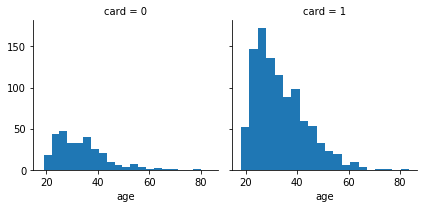

In [9]:
#plot 'card' as a function of 'age'
card_age = sns.FacetGrid(data_clean, col='card')
card_age.map(plt.hist, 'age', bins=20)


Using matplotlib, we can see that generally across all age ranges, there is little difference that your age will make your acceptance. That being said, it is clearly distinct that being in your mid-20s does provide a slight increases chance in acceptance, and this would be due to a point in one's lifetime where a credit score must and can be start to built due to job stability and natural life course. 

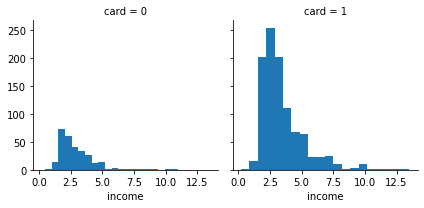

In [10]:
#plot 'card' as a function of 'income'
card_income = sns.FacetGrid(data_clean, col='card')
card_income.map(plt.hist, 'income', bins=20)


Strikingly though, income also has the same features as age. It does not seem to make much of a difference. 
However, around the £15000 to £50000 range, in other words, the average income bracket of most of the UK population, your chances are slightly higher.

In [11]:
data_clean = data_clean.drop(columns = ['share', 'expenditure', 'dependents', 'months', 'majorcards', 'active'])

We can drop these features as these may not provide any useful input, and/or may lead to overfitting of our model.

In [12]:
def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """Split data into fractions in a random order [prob, 1-prob]"""

    data = data[:]  #make a shallow copy
    random.shuffle(data)    #because shuffle modifies the list
    cut = int(len(data)*prob)   #use prob to find a cutoff
    
    return data[:cut], data[cut:]
    

In [13]:
data_tr, data_te = split_data(data_clean.values.tolist(), 0.75)

data_train = pd.DataFrame(data_tr, columns = ['card' , 'reports', 'age', 'income', 'owner', 'selfemp'])
data_test = pd.DataFrame(data_te, columns = ['card' , 'reports', 'age', 'income', 'owner', 'selfemp'])

print('The number of data records to train the model is:', len(data_train))
print('The number of data records to test the model is:', len(data_test))


The number of data records to train the model is: 984
The number of data records to test the model is: 328


We have now split our dataset into a train and test dataset, with around 75% of the data being kept for training, and the remaning 25% for testing. The _split_data_ function has been used to randomly pick records from our data to reduced any possible orderliness to how the records we're taken in our dataset

### Part III: Machine Learning models

In [14]:
X_train = data_train.drop("card", axis=1)
Y_train = data_train["card"]
X_test  = data_train.copy()


In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()


- ### Logisitic Regression


In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


84.04

With a confidence score of 84.96, we can now calculate the coefficient of the features in the decision function 
to validate our assumptions and decisions for feature creating.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).


In [16]:
coeff_df = pd.DataFrame(data_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,owner,0.450031
2,income,0.240931
1,age,-0.018639
4,selfemp,-0.363351
0,reports,-1.307490


- ### Support Vector Machines


In [17]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc


81.0

- ### K Nearest Neighbours


In [18]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn


86.99

- ### Gaussian Naive Bayes

In [19]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


83.54

- ### Perceptron


In [20]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron


84.25

- ### Linear SVC


In [21]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


83.74

- ### Stochastic Gradient Descent


In [22]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

82.01

- ### Decision Tree


In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree 


99.8

- ### Random Forest

In [24]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


99.8

In [25]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,99.80
8,Decision Tree,99.80
1,KNN,86.99
5,Perceptron,84.25
2,Logistic Regression,84.04
7,Linear SVC,83.74
4,Naive Bayes,83.54
6,Stochastic Gradient Decent,82.01
0,Support Vector Machines,81.00


### Conclusions:

As you can see from the table above, Random Forest and Decision Tree both provide a 
commendable confidence score, both equal. This maybe due to their similarity in nature.